In [61]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report as cr, confusion_matrix
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import gensim.downloader as api
from gensim.models import FastText
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from IPython.display import display_json

# Set max_display_rows option
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wikab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
data = pd.read_csv('mobil_listrik.csv')

# # Set display options to show more characters
# pd.set_option('display.max_colwidth', 30)
# pd.set_option('display.max_rows', None)

In [63]:
display(data)

,text,sentimen
0,saran sih bikin harga ionic sama kayak brio ...,positif
1,problem subsidi kualitas diturunin harga dinai...,negatif
2,baik kualitas kembang dulu baik kualitas motor...,positif
3,model jelek kwalitas buruk harga mahal croot,negatif
4,syarat ngaco woy anak muda blom punya ruma...,negatif
5,harga motor mahal masa harga mirip motor beat ...,positif
6,mol keren yah berita plus padahal mol loka...,negatif
7,proses kenal produk baru butuh waktu ganti ken...,negatif
8,subsidi tepat sasar,netral
9,adil rata terima subsidi jangan jangan pajak p...,negatif


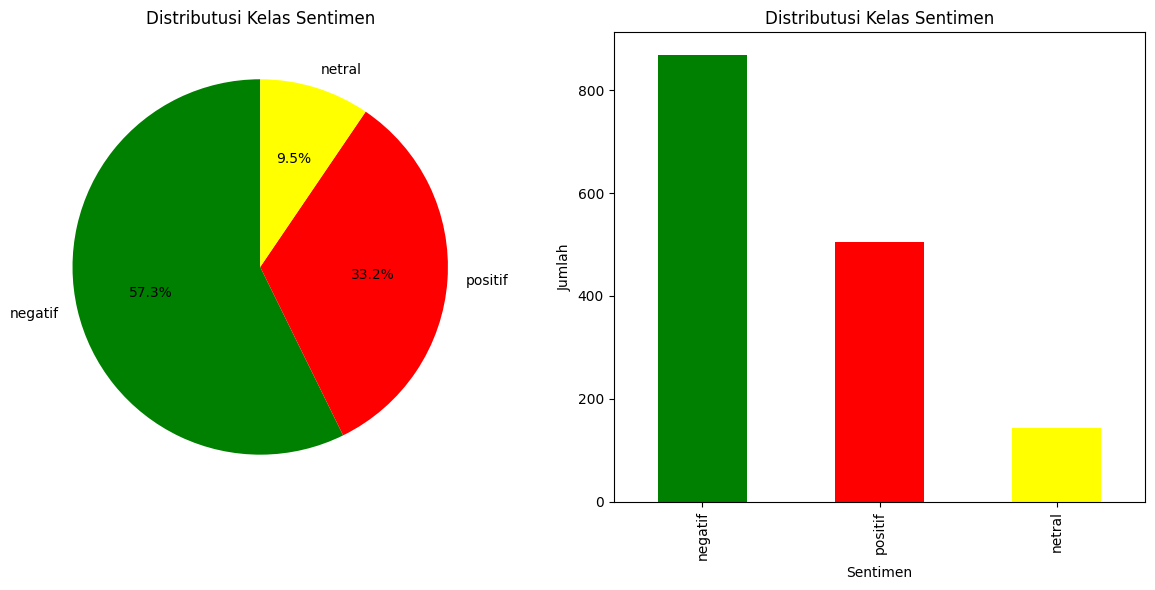

In [64]:
# Assuming 'data' is your DataFrame with a 'sentimen' column
sentimen_counts = data['sentimen'].value_counts()

# Create subplots with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart in the first subplot
axes[0].pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'yellow'])
axes[0].set_title('Distributusi Kelas Sentimen')

# Plot the bar chart in the second subplot
sentimen_counts.plot(kind='bar', ax=axes[1], color=['green', 'red', 'yellow'])
axes[1].set_title('Distributusi Kelas Sentimen')
axes[1].set_xlabel('Sentimen')
axes[1].set_ylabel('Jumlah')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [65]:
le = LabelEncoder()
data['sentimen'] = le.fit_transform(data['sentimen'])

review_positif = data[data['sentimen'] == 0]
review_negatif = data[data['sentimen'] == 1]
review_netral = data[data['sentimen'] == 2]

# Display only 'text' and 'sentimen' columns
print("20 Sampel review positif\n", review_positif[['text', 'sentimen']][:20])
print("\n20 Sampel review negatif\n", review_negatif[['text', 'sentimen']][:20])
print("\n20 Sampel review netral\n", review_netral[['text', 'sentimen']][:20])


20 Sampel review positif
                                                  text  sentimen
1   problem subsidi kualitas diturunin harga dinai...         0
3        model jelek kwalitas buruk harga mahal croot         0
4   syarat   ngaco woy anak muda   blom punya ruma...         0
6   mol keren yah   berita   plus padahal mol loka...         0
7   proses kenal produk baru butuh waktu ganti ken...         0
9   adil rata terima subsidi jangan jangan pajak p...         0
10    tepat sasar donk syarat belum tepat subsidi ...         0
11  mungkin subsidi baik arah   seragam sekolah bi...         0
13  banyak kenderaan buat tiongkok rekam bakar let...         0
15                                         tahan th           0
17             kendaran plg rawan bakar   mudah padam         0
18    buat hari   sih sangat guna     jalan jauh  ...         0
20            subsidi motor   jalan umum tolak system         0
21  apa sieh kok mbulet asli yo tiap spbu seluruh ...         0
22            

In [66]:
data['text'] = data['text'].fillna('')

# Case Folding

Case folding adalah salah satu bentuk text preprocessing yang paling sederhana dan efektif meskipun sering diabaikan. Tujuan dari case folding untuk mengubah semua huruf dalam dokumen menjadi huruf kecil. Hanya huruf ‘a’ sampai ‘z’ yang diterima. Karakter selain huruf dihilangkan dan dianggap delimiter.

In [67]:
def caseFolding(text):
    text = str(text)
    # Mengubah teks menjadi lowercase
    text = text.lower()
    
    # Menghapus whitespace
    text = ' '.join(text.split())
    
        # Menghapus angka
    text = re.sub(r"//t",r"\t",text)
    text = re.sub(r"( )\1+",r"\1",text)
    text = re.sub(r"(\n)\1+",r"\1",text)
    text = re.sub(r"(\r)\1+",r"\1",text)
    text = re.sub(r"(\t)\1+",r"\1",text)
    text = re.sub(r"(\d)\1+",r"\1",text)
    
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text

In [68]:
copy_data_casefold = data.copy()
# Apply case folding to the 'text' column
copy_data_casefold['text'] = copy_data_casefold['text'].apply(caseFolding)

# Display the 'text' column
display(copy_data_casefold['text'])


0       saran sih bikin harga ionic sama kayak brio in...
1       problem subsidi kualitas diturunin harga dinai...
2       baik kualitas kembang dulu baik kualitas motor...
3            model jelek kwalitas buruk harga mahal croot
4       syarat ngaco woy anak muda blom punya rumah bl...
5       harga motor mahal masa harga mirip motor beat ...
6       mol keren yah berita plus padahal mol lokal me...
7       proses kenal produk baru butuh waktu ganti ken...
8                                     subsidi tepat sasar
9       adil rata terima subsidi jangan jangan pajak p...
10      tepat sasar donk syarat belum tepat subsidi ku...
11      mungkin subsidi baik arah seragam sekolah bila...
12      kampung sekarang banyak banget bocil sama cewe...
13      banyak kenderaan buat tiongkok rekam bakar let...
14                                    harga terlalu mahal
15                                               tahan th
16                                     iklan kudu kencang
17            

# Tokenizing 

Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. 

In [69]:
def Tokenized(text):
    text = str(text)
    # Tokenisasi kata
    tokens = word_tokenize(text)
    
    # Distribusi frekuensi kata
    frequency_distribution = FreqDist(tokens)

    # # Tokenisasi kalimat
    # sentences = sent_tokenize(str(text))
    # return frequency_distribution.most_common()
    return frequency_distribution

In [70]:
copy_data_tokenized = copy_data_casefold.copy()
copy_data_tokenized['text'] = copy_data_tokenized['text'].apply(Tokenized)

In [71]:
display(copy_data_tokenized)
# for index, row in copy_data_tokenized.iterrows():
#     text_frequency_distribution = Tokenized(row['text'])
#     print(f"Row {index + 1} - Full Frequency Distribution: {text_frequency_distribution}")

#     # Plot distribusi frekuensi kata
#     text_frequency_distribution.plot(30, cumulative=False)
#     plt.title(f"Distribution of Words in Row {index + 1}")
#     plt.show()

,text,sentimen
0,"{'saran': 1, 'sih': 1, 'bikin': 1, 'harga': 1,...",2
1,"{'problem': 1, 'subsidi': 2, 'kualitas': 1, 'd...",0
2,"{'baik': 2, 'kualitas': 2, 'kembang': 1, 'dulu...",2
3,"{'model': 1, 'jelek': 1, 'kwalitas': 1, 'buruk...",0
4,"{'syarat': 1, 'ngaco': 2, 'woy': 1, 'anak': 1,...",0
5,"{'harga': 2, 'motor': 2, 'mahal': 1, 'masa': 1...",2
6,"{'mol': 2, 'keren': 1, 'yah': 1, 'berita': 1, ...",0
7,"{'proses': 1, 'kenal': 1, 'produk': 1, 'baru':...",0
8,"{'subsidi': 1, 'tepat': 1, 'sasar': 1}",1
9,"{'adil': 2, 'rata': 3, 'terima': 1, 'subsidi':...",0


# Filtering (Hapus Stopword)

#### Filtering adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting)  
#### Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna.

In [72]:
# Membuat objek stopword remover


def remove_stop(text):
    # # Menghapus tanda baca, mengubah ke huruf kecil, dan menghapus stop words
    # cleaned_text = stopword_remover.remove(text.translate(str.maketrans('', '', string.punctuation)).lower())
    
    # # Tokenisasi kata
    # tokens = word_tokenize(cleaned_text)
    # return tokens
    # Membuat objek stopword remover factory
    # Membuat objek stopword remover factory
    # Membuat objek stopword remover factory
    # Membuat objek stopword remover factory
   
    
    # Mendapatkan daftar stop words
    stopword = factory.create_stop_word_remover()

    # Menghapus stop words dari teks
    text_without_stopwords = stopword.remove(text)
    
    # Tokenisasi kata
    tokens = word_tokenize(text_without_stopwords)
    
    return tokens


In [73]:
factory = StopWordRemoverFactory()
stop_words = factory.get_stop_words()
display(stop_words)

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'tidak',
 'ini',
 'karena',
 'kepada',
 'oleh',
 'saat',
 'harus',
 'sementara',
 'setelah',
 'belum',
 'kami',
 'sekitar',
 'bagi',
 'serta',
 'di',
 'dari',
 'telah',
 'sebagai',
 'masih',
 'hal',
 'ketika',
 'adalah',
 'itu',
 'dalam',
 'bisa',
 'bahwa',
 'atau',
 'hanya',
 'kita',
 'dengan',
 'akan',
 'juga',
 'ada',
 'mereka',
 'sudah',
 'saya',
 'terhadap',
 'secara',
 'agar',
 'lain',
 'anda',
 'begitu',
 'mengapa',
 'kenapa',
 'yaitu',
 'yakni',
 'daripada',
 'itulah',
 'lagi',
 'maka',
 'tentang',
 'demi',
 'dimana',
 'kemana',
 'pula',
 'sambil',
 'sebelum',
 'sesudah',
 'supaya',
 'guna',
 'kah',
 'pun',
 'sampai',
 'sedangkan',
 'selagi',
 'sementara',
 'tetapi',
 'apakah',
 'kecuali',
 'sebab',
 'selain',
 'seolah',
 'seraya',
 'seterusnya',
 'tanpa',
 'agak',
 'boleh',
 'dapat',
 'dsb',
 'dst',
 'dll',
 'dahulu

In [74]:
copy_data_stop = copy_data_tokenized.copy()
copy_data_stop['text'] = copy_data_stop['text'].apply(remove_stop)


# Stemming

Stemming adalah proses menghilangkan infleksi kata ke bentuk dasarnya, namun bentuk dasar tersebut tidak berarti sama dengan akar kata (root word). Misalnya kata “mendengarkan”, “dengarkan”, “didengarkan” akan ditransformasi menjadi kata “dengar”.

In [75]:
copy_data_stemmed = copy_data_stop()

# Create a Stemmer instance
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Apply stemming to the 'text' column
copy_data_stemmed['text'] = copy_data_stemmed['text'].apply(lambda x: stemmer.stem(x))

# Pembagian Data Train dan Data Test

In [76]:
x = data["text"]
y = data["sentimen"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ekstrasi Fitur TF-IDF

In [77]:
vectorizer = TfidfVectorizer()
TF_IDF_X_train_vectorized = vectorizer.fit_transform(x_train)
TF_IDF_X_test_vectorized = vectorizer.transform(x_test)

In [78]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(TF_IDF_X_train_vectorized, y_train)
svm_predictions = svm_classifier.predict(TF_IDF_X_test_vectorized)

In [79]:
# Multinomial Naive Bayes (MNB)
mnb_classifier = MultinomialNB()
mnb_classifier.fit(TF_IDF_X_train_vectorized, y_train)
mnb_predictions = mnb_classifier.predict(TF_IDF_X_test_vectorized)

In [80]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(TF_IDF_X_train_vectorized, y_train)
dt_predictions = dt_classifier.predict(TF_IDF_X_test_vectorized)

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(TF_IDF_X_train_vectorized, y_train)
rf_predictions = rf_classifier.predict(TF_IDF_X_test_vectorized)


In [82]:
# Assuming you have your TF-IDF vectors and labels
# TF_IDF_X_train_vectorized, TF_IDF_X_test_vectorized, y_train, y_test

# Splitting the data into training and testing sets
# You might have already done this, but just to make sure
# x_train, x_test, y_train, y_test = train_test_split(your_data, your_labels, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transforming the training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)

# Initializing the Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)

# Training the Logistic Regression model
lr_classifier.fit(X_train_tfidf, y_train)

# Making predictions on the test set
lr_predictions = lr_classifier.predict(X_test_tfidf)


In [83]:
# Evaluate models
lr_accuracy = accuracy_score(y_test, lr_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("MNB Accuracy:", mnb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 0.7598684210526315
SVM Accuracy: 0.7730263157894737
MNB Accuracy: 0.6151315789473685
Decision Tree Accuracy: 0.6151315789473685
Random Forest Accuracy: 0.7039473684210527


# Ekstrasi Fitur BOW (Bag of Words)

In [84]:
BOW_vectorizer = CountVectorizer()
BOW_X_train_vectorized = BOW_vectorizer.fit_transform(x_train)
BOW_X_test_vectorized = BOW_vectorizer.transform(x_test)

In [85]:
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(BOW_X_train_vectorized, y_train)
svm_predictions = svm_classifier.predict(BOW_X_test_vectorized)

In [86]:
# Multinomial Naive Bayes (MNB)
mnb_classifier = MultinomialNB()
mnb_classifier.fit(BOW_X_train_vectorized, y_train)
mnb_predictions = mnb_classifier.predict(BOW_X_test_vectorized)

In [87]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(BOW_X_train_vectorized, y_train)
dt_predictions = dt_classifier.predict(BOW_X_test_vectorized)

In [88]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(BOW_X_train_vectorized, y_train)
rf_predictions = rf_classifier.predict(BOW_X_test_vectorized)


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your BOW vectors and labels
# BOW_X_train_vectorized, BOW_X_test_vectorized, y_train, y_test

# Splitting the data into training and testing sets
# You might have already done this, but just to make sure
# x_train, x_test, y_train, y_test = train_test_split(your_data, your_labels, test_size=0.2, random_state=42)

# Initializing the CountVectorizer for Bag-of-Words
count_vectorizer = CountVectorizer()

# Transforming the training and testing data
X_train_bow = count_vectorizer.fit_transform(x_train)
X_test_bow = count_vectorizer.transform(x_test)

# Initializing the Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)

# Training the Logistic Regression model
lr_classifier.fit(X_train_bow, y_train)

# Making predictions on the test set
lr_predictions = lr_classifier.predict(X_test_bow)

# Evaluating the performance
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [90]:
# Evaluate models
svm_accuracy = accuracy_score(y_test, svm_predictions)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print accuracies
print("SVM Accuracy (BOW):", svm_accuracy)
print("LR Accuracy (BOW):", lr_accuracy)
print("Decision Tree Accuracy (BOW):", dt_accuracy)
print("Random Forest Accuracy (BOW):", rf_accuracy)

SVM Accuracy (BOW): 0.7236842105263158
LR Accuracy (BOW): 0.756578947368421
Decision Tree Accuracy (BOW): 0.5657894736842105
Random Forest Accuracy (BOW): 0.694078947368421


# Fast Text Embeddings
Model FastText memungkinkan representasi vektor kata-kata yang memperhitungkan subkata.
Berguna ketika ada kata-kata yang tidak ada dalam vokabuler tetapi memiliki subkata yang sering muncul.


In [91]:
# # Download pre-trained FastText model
# model = api.load("fasttext-wiki-news-subwords-300")


In [92]:
# # Mendapatkan vektor representasi teks menggunakan FastText
# X_vectorized_train = []
# X_vectorized_test = []

# def get_average_vector(tokens):
#     vectors = []
#     for word in tokens:
#         try:
#             vector = model[word]
#             vectors.append(vector)
#         except KeyError:
#             # Kata tidak dikenal, dapat diabaikan atau diganti dengan representasi khusus
#             # vectors.append(np.zeros(model.vector_size))  # Ganti dengan representasi nol jika perlu
#             pass
    
#     # Ambil rata-rata vektor kata-kata dalam satu dokumen
#     if vectors:
#         avg_vector = np.mean(vectors, axis=0)
#     else:
#         avg_vector = np.zeros(model.vector_size)  # Ganti dengan representasi nol jika tidak ada kata yang dikenal
    
#     return avg_vector

# for doc in x_train:
#     X_vectorized_train.append(get_average_vector(doc.split()))

# for doc in x_test:
#     X_vectorized_test.append(get_average_vector(doc.split()))

In [93]:
# # Support Vector Machine (SVM)
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(X_vectorized_train, y_train)
# svm_predictions = svm_classifier.predict(X_vectorized_test)
# svm_accuracy = accuracy_score(y_test, svm_predictions)

In [94]:
# Multinomial Naive Bayes (MNB)
# (Note: MNB is typically used with integer-valued features, not continuous embeddings)
# For illustration purposes, you may want to consider using a different algorithm for MNB.
# mnb_classifier = MultinomialNB()
# mnb_classifier.fit(X_vectorized_train, y_train)
# mnb_predictions = mnb_classifier.predict(X_vectorized_test)
# mnb_accuracy = accuracy_score(y_test, mnb_predictions)

In [95]:
# # Decision Tree
# dt_classifier = DecisionTreeClassifier(random_state=42)
# dt_classifier.fit(X_vectorized_train, y_train)
# dt_predictions = dt_classifier.predict(X_vectorized_test)
# dt_accuracy = accuracy_score(y_test, dt_predictions)

In [96]:
# # Random Forest
# rf_classifier = RandomForestClassifier(random_state=42)
# rf_classifier.fit(X_vectorized_train, y_train)
# rf_predictions = rf_classifier.predict(X_vectorized_test)
# rf_accuracy = accuracy_score(y_test, rf_predictions)

In [97]:
# # Print accuracies
# print("SVM Accuracy (FastText):", svm_accuracy)
# # print("MNB Accuracy (FastText):", mnb_accuracy)
# print("Decision Tree Accuracy (FastText):", dt_accuracy)
# print("Random Forest Accuracy (FastText):", rf_accuracy)

# TF-IDF with Weighted Embedding

In [98]:
# # Download pre-trained Word2Vec model
# word2vec_model = api.load("word2vec-google-news-300")

In [99]:
# # TF-IDF Vectorization
# tfidf_vectorizer = TfidfVectorizer()
# X_tfidf_train = tfidf_vectorizer.fit_transform(x_train)
# X_tfidf_test = tfidf_vectorizer.transform(x_test)

# # Menghitung TF-IDF Weighted Word Embeddings untuk set pelatihan
# X_weighted_word_embeddings_train = []

# for doc in x_train:
#     tokens = doc.split()
#     weighted_embeddings = []
#     for token in tokens:
#         if token in word2vec_model.key_to_index and token in tfidf_vectorizer.vocabulary_:
#             tfidf_weight = X_tfidf_train[0, tfidf_vectorizer.vocabulary_[token]]
#             word_embedding = word2vec_model[token]
#             weighted_embedding = tfidf_weight * word_embedding
#             weighted_embeddings.append(weighted_embedding)
    
#     if weighted_embeddings:
#         avg_weighted_embedding = np.mean(weighted_embeddings, axis=0)
#     else:
#         avg_weighted_embedding = np.zeros(word2vec_model.vector_size)
    
#     X_weighted_word_embeddings_train.append(avg_weighted_embedding)

# # Menghitung TF-IDF Weighted Word Embeddings untuk set pengujian
# X_weighted_word_embeddings_test = []

# for doc in x_test:
#     tokens = doc.split()
#     weighted_embeddings = []
#     for token in tokens:
#         if token in word2vec_model.key_to_index and token in tfidf_vectorizer.vocabulary_:
#             tfidf_weight = X_tfidf_test[0, tfidf_vectorizer.vocabulary_[token]]
#             word_embedding = word2vec_model[token]
#             weighted_embedding = tfidf_weight * word_embedding
#             weighted_embeddings.append(weighted_embedding)
    
#     if weighted_embeddings:
#         avg_weighted_embedding = np.mean(weighted_embeddings, axis=0)
#     else:
#         avg_weighted_embedding = np.zeros(word2vec_model.vector_size)
    
#     X_weighted_word_embeddings_test.append(avg_weighted_embedding)

In [100]:
# # Support Vector Machine (SVM)
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(X_weighted_word_embeddings_train, y_train)
# svm_predictions = svm_classifier.predict(X_weighted_word_embeddings_test)
# svm_accuracy = accuracy_score(y_test, svm_predictions)

In [101]:
# # Random Forest
# rf_classifier = RandomForestClassifier(random_state=42)
# rf_classifier.fit(X_weighted_word_embeddings_train, y_train)
# rf_predictions = rf_classifier.predict(X_weighted_word_embeddings_test)
# rf_accuracy = accuracy_score(y_test, rf_predictions)

In [102]:
# # Decision Tree
# dt_classifier = DecisionTreeClassifier(random_state=42)
# dt_classifier.fit(X_weighted_word_embeddings_train, y_train)
# dt_predictions = dt_classifier.predict(X_weighted_word_embeddings_test)
# dt_accuracy = accuracy_score(y_test, dt_predictions)

In [103]:
# # Print accuracies
# print("SVM Accuracy (TF-IDF Weighted Word Embeddings):", svm_accuracy)
# print("Random Forest Accuracy (TF-IDF Weighted Word Embeddings):", rf_accuracy)
# print("Decision Tree Accuracy (TF-IDF Weighted Word Embeddings):", dt_accuracy)

# BERT

In [104]:
# import torch
# from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from torch.utils.data import DataLoader, TensorDataset

# # Pra-pemrosesan
# x = data["text"]
# y = data["sentimen"]

# # Pembagian data
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Tokenisasi menggunakan GPT tokenizer
# tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
# tokenizer.pad_token = tokenizer.eos_token  # Menggunakan token EOS sebagai token padding
# x_train_tokens = tokenizer(x_train.tolist(), padding=True, truncation=True, max_length=256, return_tensors='pt', dtype=torch.long)
# x_test_tokens = tokenizer(x_test.tolist(), padding=True, truncation=True, max_length=256, return_tensors='pt', dtype=torch.long)

# # Mengambil model GPT untuk klasifikasi
# model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=3)  # 3 label: positif, negatif, netral

# # Pelatihan (catatan: GPT umumnya dilatih dalam tugas-tugas generatif, bukan klasifikasi)
# optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
# train_dataset = TensorDataset(x_train_tokens['input_ids'], x_train_tokens['attention_mask'], torch.tensor(y_train))
# train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# epochs = 3
# for epoch in range(epochs):
#     for batch in train_dataloader:
#         optimizer.zero_grad()
#         inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
#         outputs = model(**inputs)
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()

# # Evaluasi
# model.eval()
# with torch.no_grad():
#     test_inputs = {'input_ids': x_test_tokens['input_ids'], 'attention_mask': x_test_tokens['attention_mask']}
#     test_outputs = model(**test_inputs)
#     predictions = torch.argmax(test_outputs.logits, dim=1)

# # Akurasi
# accuracy = accuracy_score(y_test, predictions.numpy())
# print("Accuracy:", accuracy)